# Flight Price Prediction
## Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

### FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")    

## Training dataset

In [2]:
train=pd.read_excel(r"C:\Users\ABC\OneDrive\Desktop\Data_Train.xlsx")

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.shape

(10683, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

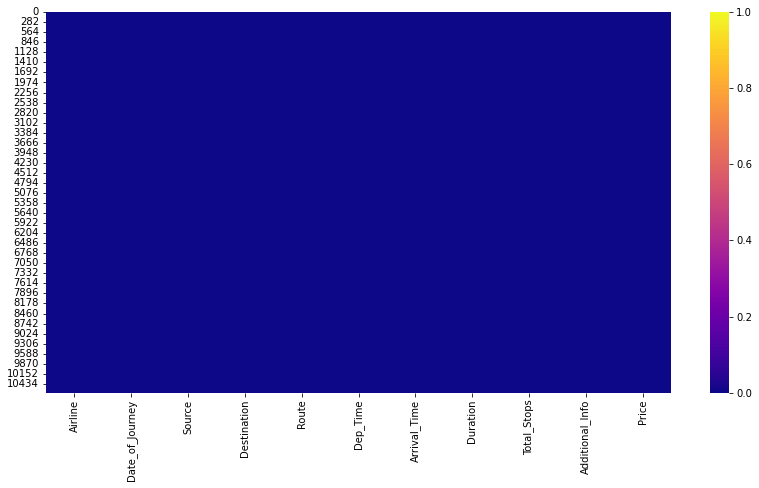

In [8]:
plt.figure(figsize=[14,7])
sns.heatmap(train.isnull(),cmap='plasma')
plt.show()

### Observation-1

In the above dataset :

1) The size of table is 10683 * 11 i.e. no. of rows are 10683 and no. of columns are 11(including target).

2) Out of 11 columns 1 columns(price) are continuous in nature and rest 10 are object data type.

3) Null values(only 2) are present in the data set as we can see in the result, So we will drop 2 rows which have null values.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format

## Working on Training Dataset

## EDA
### Exploratory Data Analysis

#### Dropping null value rows

In [9]:
train.dropna(inplace=True)

In [10]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train.shape

(10682, 11)

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


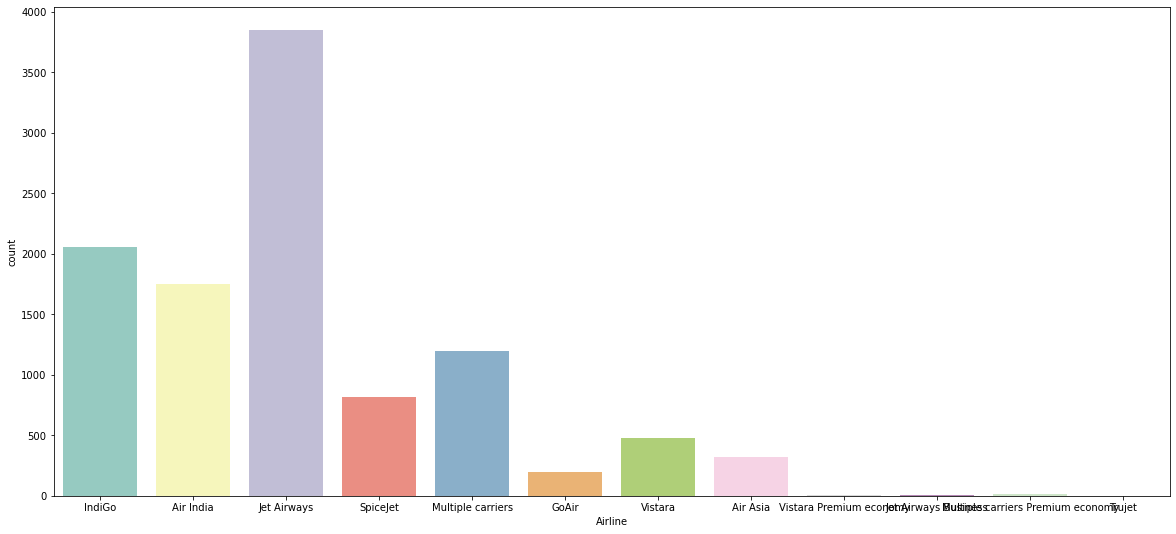

In [12]:
print(train['Airline'].value_counts())
plt.figure(figsize=[20,9])
sns.countplot(train['Airline'],palette='Set3')
plt.show()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


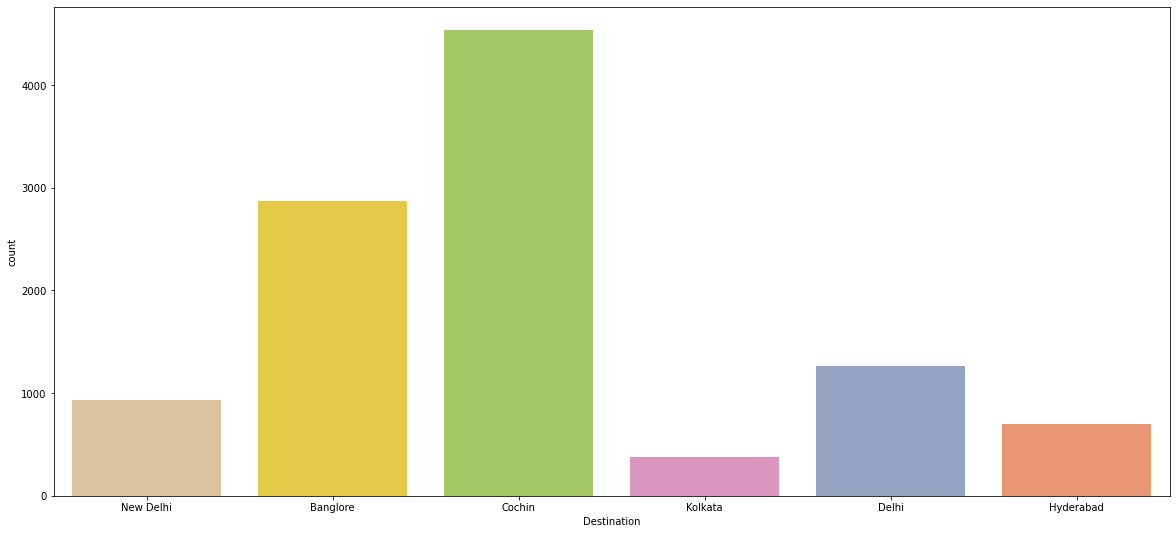

In [13]:
print(train['Destination'].value_counts())
plt.figure(figsize=[20,9])
sns.countplot(train['Destination'],palette='Set2_r')
plt.show()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


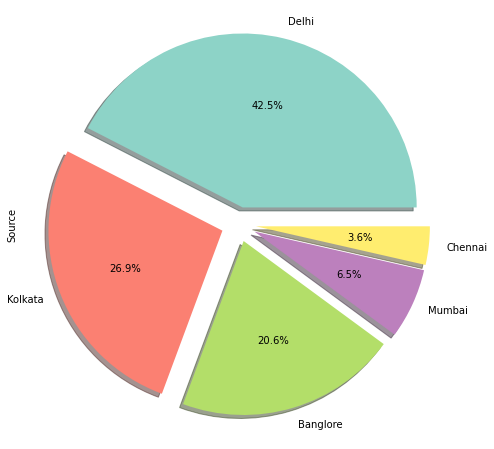

In [14]:
print(train['Source'].value_counts())
train.Source.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1],shadow=True,figsize=(8,8),autopct='%1.1f%%',cmap='Set3')
plt.show()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


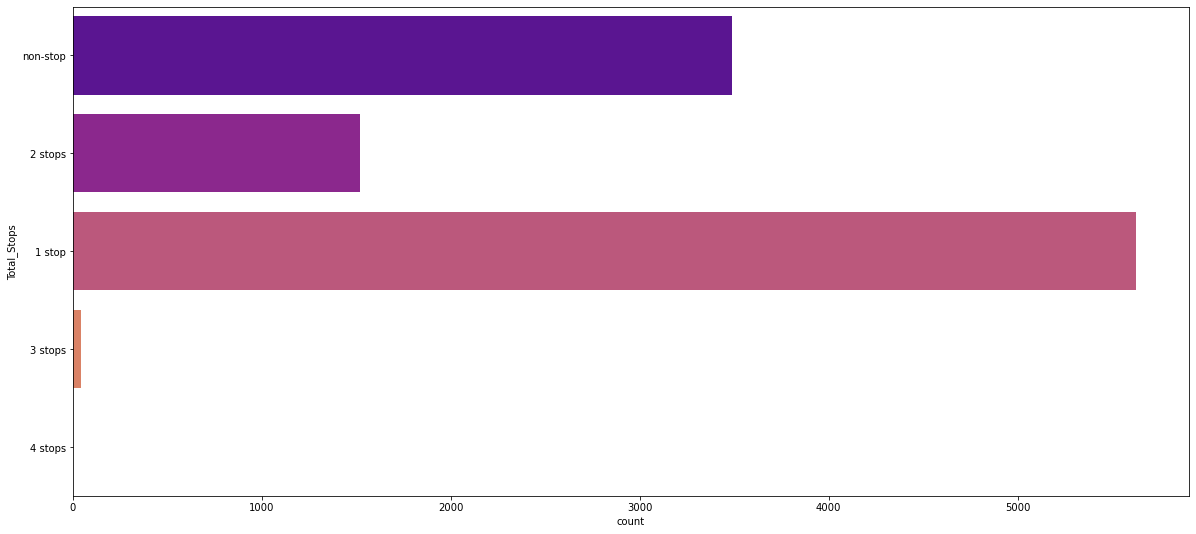

In [15]:
print(train['Total_Stops'].value_counts())
plt.figure(figsize=[20,9])
sns.countplot(y=train['Total_Stops'],palette='plasma')
plt.show()

In [16]:
pd.Series(train['Additional_Info'].unique())

0                         No info
1     In-flight meal not included
2    No check-in baggage included
3                 1 Short layover
4                         No Info
5                  1 Long layover
6                 Change airports
7                  Business class
8                  Red-eye flight
9                  2 Long layover
dtype: object

In [17]:
train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### Observation-2

From the above graph we can conclude that:

1) Jet airways having a larget number of flights(3849) as compare to other airways.

2) Indigo(2053), Air india(1751) and Multiple carriers(1196) airways standing over the 2nd, 3rd and 4th position and having good flights as comapre to others.

3) Spicejet(818), Vistara(479), Air asia(319) and Go air(194) airways have a less number of flights and Multiple carriers Premium economy(13), Jet Airways Business(6), Turget(1) and Vistara Premium economy(3) airways have very less or we can say few number of flights as comapre to others.

4) Destination- Cochin(4536), Banglore(2871) and Delhi(1265) cities are the most preferable destination by the peoples.

5) New delhi(932), Hyderabad(697) and Kolkata(381) cities are also important destination for the peoples.

6) Delhi, Kolkata ,Mumbai , Chennai and Banglore are the main source of flights but Delhi(42.5%) is the most preferable source for all the airways.

7) When we see the total stops columns, Most of the flights takes one stopage(5625) and there are many flights also which takes zero stopage(3491). Number of 3 stopage is very less and some flights takes 2 stopage(1520) as well.

8) When we see the Additional_info column, We can say that our 80% of data are having no info Therefore we can think to drop this column in upcoming stage.

### Checking Relations

<Figure size 1080x648 with 0 Axes>

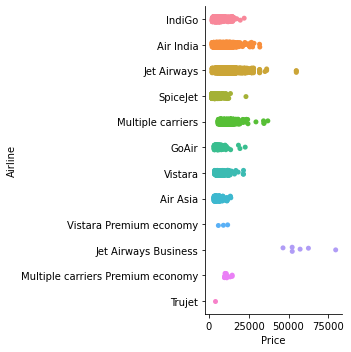

In [18]:
plt.figure(figsize=[15,9])
sns.catplot(data=train,x='Price',y='Airline') 
plt.show()

<Figure size 3600x1800 with 0 Axes>

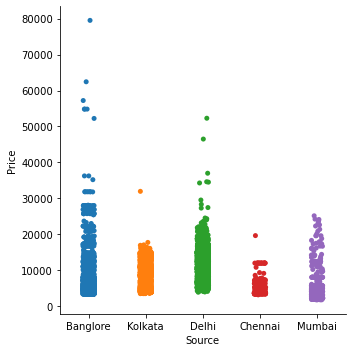

In [19]:
plt.figure(figsize=[50,25])
sns.catplot(data=train,x='Source',y='Price') 
plt.show()

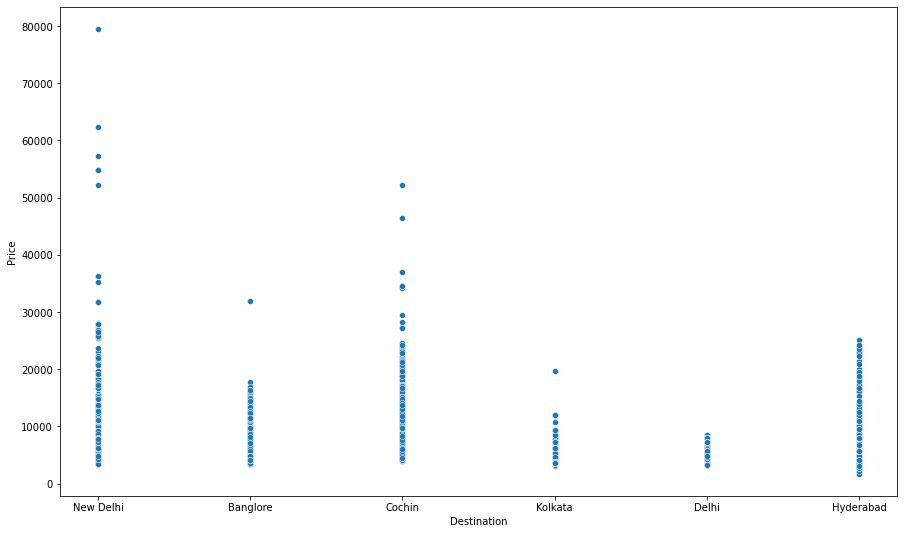

In [20]:
plt.figure(figsize=[15,9])
sns.scatterplot(data=train,x='Destination',y='Price') 
plt.show()

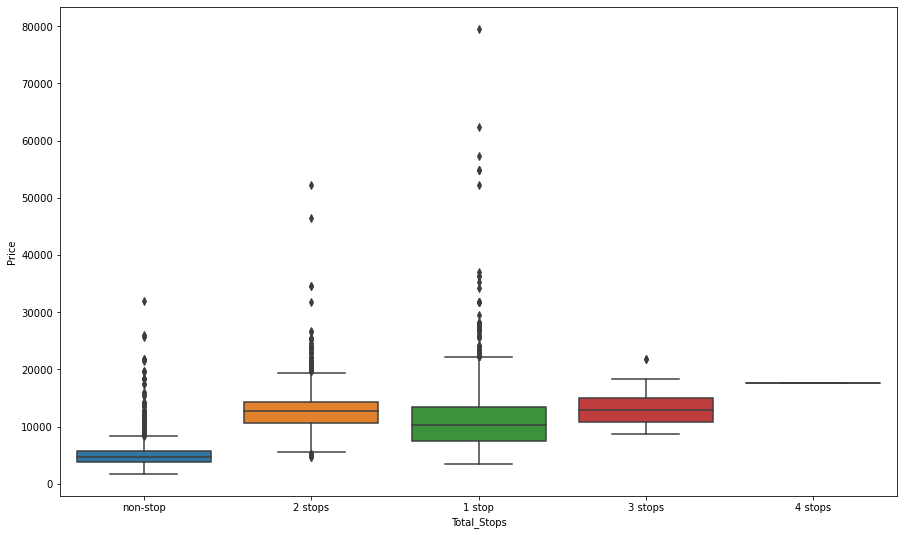

In [21]:
plt.figure(figsize=[15,9])
sns.boxplot(data=train,x='Total_Stops',y='Price') 
plt.show()

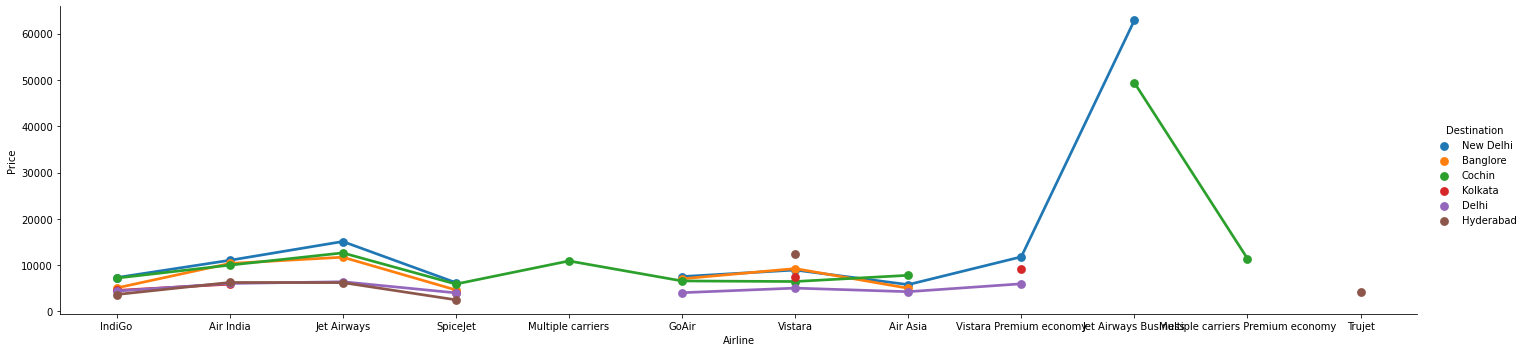

In [22]:
sns.factorplot(x = 'Airline', y = 'Price', hue = 'Destination', data=train, aspect= 4, ci=None)

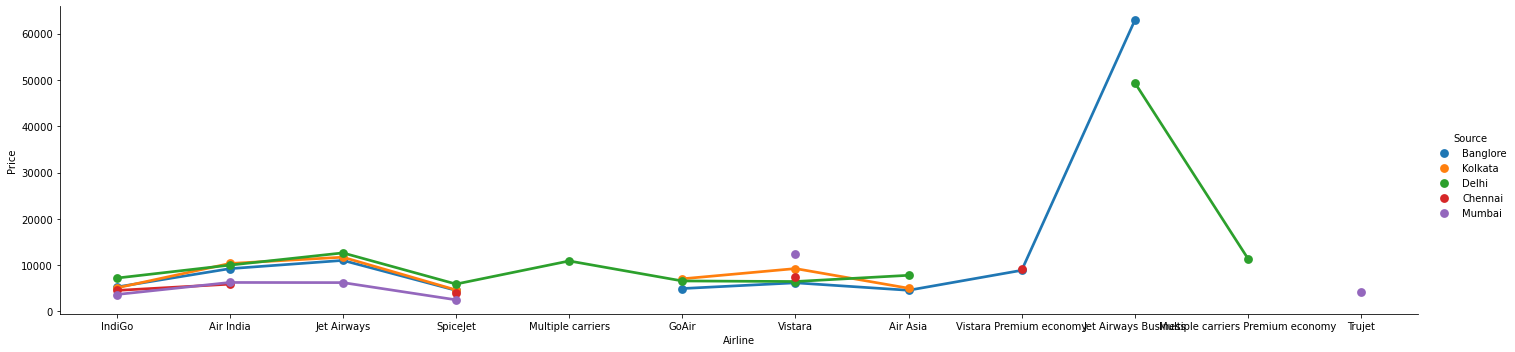

In [23]:
sns.factorplot(x = 'Airline', y = 'Price', hue = 'Source', data=train, aspect= 4, ci=None)

### Observation-2(A)

As we can see in the in tyhe above graphs:
    
1) Price of jet airways is higher as compare to other airlines.

2) The Ticket price of airline which starts with delhi and banglore are higher as compare to other sources.

3) The Ticket price is higher when the destination is New delhi and coachin.

4) Most of the airlines takes 1 or 2 stops to reach the destination point, and very less flights takes 4 stops to reach the destination point.

## Data preprocesssing

In [24]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### We have some columns which demands to convert in date time format because our machine will not able learn that format which we got from the excel sheet, So we will change the format of some columns which is releted to date time.

1) Date_of_Journey

2) Dep_Time

3) Arrival_Time

4) Duration

### 1) Date_of_Journey

In [25]:
train['Journey_day']=pd.to_datetime(train['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [26]:
train['Journey_month']=pd.to_datetime(train['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [27]:
train.drop(['Date_of_Journey'],axis=1,inplace=True)

### 2) Dep_Time

In [28]:
train['Dep_hour']=pd.to_datetime(train['Dep_Time']).dt.hour

In [29]:
train['Dep_min']=pd.to_datetime(train['Dep_Time']).dt.minute

In [30]:
train.drop(['Dep_Time'],axis=1,inplace=True)

### 3) Arrival_Time

In [31]:
train['Arrival_hour']=pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_min']=pd.to_datetime(train['Arrival_Time']).dt.minute

In [32]:
train.drop(['Arrival_Time'],axis=1,inplace=True)

### 4) Duration

In [33]:
duration=list(train['Duration'])

In [34]:
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [35]:
train.drop(['Duration'],axis=1,inplace=True)

In [36]:
train['Duration_hour']=duration_hours
train['Duration_min']=duration_mins

### Dropping Additional_info columns because this column is not so much important for model building

In [37]:
train.drop(['Additional_Info'],axis=1,inplace=True)

.

In [38]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,1,16,50,21,35,4,45


### Checking relation between route column and total stops column.

In [39]:
train['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [40]:
train['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [41]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

### Observation-3

As we can see Route and total_stops columns are providing same information, So we can think to drop one of them.
We are droping route column.

In [42]:
train.drop(['Route'],axis=1,inplace=True)

In [43]:
train['Total_Stops']=train['Total_Stops'].replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4})

In [44]:
train['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

.

In [45]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,1,16,50,21,35,4,45


## Adopting Encoding technique

We will use encoding technique on three columns :
    
1) Airline
    
2) Source
    
3) Destination
    
For this we are using One hot encoding technique to encode the data.    

### 1) Airline

In [46]:
Airline =train[['Airline']]

In [47]:
Airline=pd.get_dummies(Airline,drop_first=True)

In [48]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### 2) Source

In [49]:
Source=train[['Source']]

In [50]:
Source=pd.get_dummies(Source,drop_first=True)

In [51]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### 3) Destination

In [52]:
Destination=train[['Destination']]

In [53]:
Destination=pd.get_dummies(Destination,drop_first=True)

In [54]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### Dropping above three columns

In [55]:
train.drop(['Airline'],axis=1,inplace=True)
train.drop(['Source'],axis=1,inplace=True)
train.drop(['Destination'],axis=1,inplace=True)

### Concatinating Data Frame

In [56]:
train=pd.concat([train,Airline,Source,Destination],axis=1)

In [57]:
train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [58]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

.

.

# Testing Dataset

In [59]:
test=pd.read_excel(r"C:\Users\ABC\OneDrive\Desktop\Test_set.xlsx")

In [60]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [61]:
test.shape

(2671, 10)

In [62]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [64]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

#### We have some columns which demands to convert in date time format because our machine will not able learn that format which we got from the excel sheet, So we will change the format of some columns which is releted to date time.

1) Date_of_Journey

2) Dep_Time

3) Arrival_Time

4) Duration

### 1) Date_of_Journey

In [65]:
test['Journey_day']=pd.to_datetime(test['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [66]:
test['Journey_month']=pd.to_datetime(test['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [67]:
test.drop(['Date_of_Journey'],axis=1,inplace=True)

### 2) Dep_Time

In [68]:
test['Dep_hour']=pd.to_datetime(test['Dep_Time']).dt.hour

In [69]:
test['Dep_min']=pd.to_datetime(test['Dep_Time']).dt.minute

In [70]:
test.drop(['Dep_Time'],axis=1,inplace=True)

### 3) Arrival_Time

In [71]:
test['Arrival_hour']=pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arrival_min']=pd.to_datetime(test['Arrival_Time']).dt.minute

In [72]:
test.drop(['Arrival_Time'],axis=1,inplace=True)

### 4) Duration

In [73]:
duration=list(test['Duration'])

In [74]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [75]:
test['Duration_hour']=duration_hours
test['Duration_min']=duration_mins

In [76]:
test.drop(['Duration'],axis=1,inplace=True)

### Dropping Additional_info columns because this column is not so much important for model building

In [77]:
test.drop(['Additional_Info'],axis=1,inplace=True)

In [78]:
test.head()

,Airline,Source,Destination,Route,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,12,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,21,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,21,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,24,24,23,55,2,45,2,50


### Checking relation between route column and total stop column.

In [79]:
test['Route'].value_counts()

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL                  1
CCU → PAT → BLR                  1
BLR → VGA → DEL                  1
BOM → GOI → PNQ → HYD            1
Name: Route, Length: 100, dtype: int64

In [80]:
test['Route'].unique()

array(['DEL → BOM → COK', 'CCU → MAA → BLR', 'BLR → DEL',
       'BLR → TRV → DEL', 'CCU → HYD → BLR', 'CCU → BLR',
       'CCU → BOM → BLR', 'DEL → MAA → BOM → COK', 'DEL → HYD → COK',
       'BLR → BOM → DEL', 'CCU → DEL → BLR', 'DEL → JAI → BOM → COK',
       'DEL → BHO → BOM → COK', 'BOM → HYD', 'CCU → PNQ → BLR',
       'MAA → CCU', 'CCU → BOM → COK → BLR', 'DEL → BLR → COK',
       'DEL → HYD → MAA → COK', 'DEL → MAA → COK',
       'CCU → IXR → BBI → BOM → BLR', 'CCU → DEL → AMD → BLR',
       'DEL → COK', 'CCU → JAI → BOM → BLR', 'DEL → LKO → COK',
       'CCU → IXB → BLR', 'DEL → CCU → BOM → COK',
       'CCU → GAU → DEL → BLR', 'BLR → COK → DEL',
       'BLR → BOM → NAG → DEL', 'CCU → BBI → BOM → BLR',
       'BLR → AMD → DEL', 'BOM → DEL → HYD', 'DEL → GOI → BOM → COK',
       'DEL → IXU → BOM → COK', 'DEL → HYD → BOM → COK',
       'CCU → DEL → COK → BLR', 'BLR → GOI → DEL',
       'BLR → BOM → BHO → DEL', 'DEL → IDR → BOM → COK',
       'DEL → AMD → BOM → COK', 'DEL → RPR →

In [81]:
test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

#### As we can see Route and total_stops columns are providing same information, So we can think to drop one of them.
#### We are droping route column.

In [82]:
test.drop(['Route'],axis=1,inplace=True)

In [83]:
test['Total_Stops']=test['Total_Stops'].replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4})

In [84]:
test['Total_Stops'].value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

In [85]:
test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,24,23,55,2,45,2,50


### Adopting Encoding technique

We will use encoding technique on three columns :
    
1) Airline
    
2) Source
    
3) Destination
    
For this we are using One hot encoding technique to encode the data. 

### 1) Airline

In [86]:
Airline =test[['Airline']]

In [87]:
Airline=pd.get_dummies(Airline,drop_first=True)

In [88]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


### 2) Source

In [89]:
Source=test[['Source']]

In [90]:
Source=pd.get_dummies(Source,drop_first=True)

In [91]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


### 3) Destination

In [92]:
Destination=test[['Destination']]

In [93]:
Destination=pd.get_dummies(Destination,drop_first=True)

In [94]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


### Droping above three columns

In [95]:
test.drop(['Airline'],axis=1,inplace=True)
test.drop(['Source'],axis=1,inplace=True)
test.drop(['Destination'],axis=1,inplace=True)

### Concatinating Data Frame

In [96]:
test=pd.concat([test,Airline,Source,Destination],axis=1)

In [97]:
test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,21,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,21,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,24,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hour', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

.

.

### ------------------------------------------------------------------------------------------------------------------------------

In [99]:
train.shape

(10682, 30)

In [100]:
y=train['Price']

In [101]:
x=train.drop(['Price'],axis=1)

In [102]:
x.shape

(10682, 29)

In [103]:
y.shape

(10682,)

## Model learning phase-prediction phase

#### So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target.
Here we are going to use Regression model because our target column is continous in nature.

For Regression model, Some matrix we are going to find like:

1) R2 Score.

2) Mean absolute error.

3) Mean squared error.

4) Root mean squared error.


#### Models

1. Logistic regression

2. Decision Tree Regressor

3. KNeighbors Regressor

4. Support vectod machine Regressor

5. Random Forest Regressor

6. AdaBoost Regressor

7. Gradient Boosting Regressor

8. XGboost Regressor

9. Naive bayes Regressor

In [104]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xg
from sklearn.svm import SVR

In [105]:
def model_select(model):
    max_score=0
    max_state=0
    for p in range(0,150):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=p)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=p
    print("Max score is {} with random state {}".format(max_score,max_state))

## Linear Regression

Finding best random state by calling model_select function

In [106]:
model_select(LinearRegression)

Max score is 0.6662353309119071 with random state 79


In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=79)

In [109]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print('Mean_squared error:',mean_squared_error(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('r2_score:',r2_score(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean_squared error: 7364063.406579466
Mean absolute error: 1950.2473855266849
r2_score: 0.6662353309119071
Root mean squared error: 2713.680785681961


In [110]:
for i in range(8,15):
    cvs=cross_val_score(lr,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 8 --- 0.6118353212790812
Cross validation score when cv = 9 --- 0.611242795448287
Cross validation score when cv = 10 --- 0.6112864045999102
Cross validation score when cv = 11 --- 0.6107537121471606
Cross validation score when cv = 12 --- 0.6115883149363666
Cross validation score when cv = 13 --- 0.6112231086102302
Cross validation score when cv = 14 --- 0.6113202077111156


In [136]:
r2_Scorelr=66.62
cross_vallr=61.18
diffrencelr=66.62-61.18
cvlr=8

## Decision tree regressor

Finding best random state by calling model_select function

In [112]:
model_select(DecisionTreeRegressor)

Max score is 0.7120800299391745 with random state 94


In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=94)

In [117]:
Dt=DecisionTreeRegressor()
Dt.fit(x_train,y_train)
pred=Dt.predict(x_test)
print("r2 score : ",r2_score(y_test,pred))
print("Mean absoluate error :",mean_absolute_error(y_test,pred))
print("Means squred error:" ,mean_squared_error(y_test,pred))
print("Root mean squred error: ",np.sqrt(mean_squared_error(y_test,pred)))

r2 score :  0.7099620487244125
Mean absoluate error : 1627.2348889023922
Means squred error: 7236195.812328768
Root mean squred error:  2690.0178089240912


In [118]:
for i in range(8,15):
    cvs=cross_val_score(Dt,x,y,cv=i)
    print("Cross validation score when cv =",i,'  ',cvs.mean())

Cross validation score when cv = 8    0.6521218835812083
Cross validation score when cv = 9    0.6515989050576532
Cross validation score when cv = 10    0.6538064611214909
Cross validation score when cv = 11    0.6501384703990296
Cross validation score when cv = 12    0.6479355359155089
Cross validation score when cv = 13    0.6525136515213534
Cross validation score when cv = 14    0.6556050865519504


In [137]:
r2_Scoredt=70.87
cross_valdt=65.56
diffrencedt=70.87-65.56
cvdt=14

## KNeighbor regressor

Finding best random state by calling model_select function

In [120]:
model_select(KNeighborsRegressor)

Max score is 0.602006814955836 with random state 99


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [122]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squred error :",mean_squared_error(y_test,pred))
print("Root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 0.602006814955836
Mean absolute error: 1895.8739259889408
Mean squred error : 7647710.256095279
Root mean squred error: 2765.449376881681


In [123]:
for i in range(7,15):
    cvs=cross_val_score(knn,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.5503308924164078
Cross validation score when cv = 8 --- 0.5468641707991098
Cross validation score when cv = 9 --- 0.5481647131137756
Cross validation score when cv = 10 --- 0.553573185981259
Cross validation score when cv = 11 --- 0.5530721405422444
Cross validation score when cv = 12 --- 0.5515993780558832
Cross validation score when cv = 13 --- 0.5550303804078478
Cross validation score when cv = 14 --- 0.5547032876353359


In [138]:
r2_Scoreknn=60.20
cross_valknn=55.50
diffrenceknn=60.20-55.50
cvknn=13

## Lasso Regressor

In [125]:
model_select(Lasso)

Max score is 0.6663451241235426 with random state 79


In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=79)

In [127]:
lss=Lasso()
lss.fit(x_train,y_train)
pred=lss.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squred error :",mean_squared_error(y_test,pred))
print("Root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 0.6663451241235426
Mean absolute error: 1949.1239150448166
Mean squred error : 7361640.968715371
Root mean squred error: 2713.234410941187


In [128]:
for i in range(7,15):
    cvs=cross_val_score(lss,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.6113230424382083
Cross validation score when cv = 8 --- 0.6115468831547075
Cross validation score when cv = 9 --- 0.6110698032774668
Cross validation score when cv = 10 --- 0.6111256726987744
Cross validation score when cv = 11 --- 0.6105169776037127
Cross validation score when cv = 12 --- 0.6113472884975838
Cross validation score when cv = 13 --- 0.6110534109533208
Cross validation score when cv = 14 --- 0.6111500566954806


In [164]:
r2_Scorelss=66.63
cross_vallss=61.13
diffrencelss=66.63-61.13
cvklss=7

## Ridge Regressor

In [132]:
model_select(Ridge)

Max score is 0.6605109280608573 with random state 79


In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=79)

In [134]:
ri=Ridge()
ri.fit(x_train,y_train)
pred=ri.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squred error :",mean_squared_error(y_test,pred))
print("Root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 0.6605109280608573
Mean absolute error: 1959.1907073842335
Mean squred error : 7490364.56863808
Root mean squred error: 2736.8530411109177


In [140]:
for i in range(7,15):
    cvs=cross_val_score(ri,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.6104026075072884
Cross validation score when cv = 8 --- 0.6105513505006479
Cross validation score when cv = 9 --- 0.6102113193215423
Cross validation score when cv = 10 --- 0.6102360699534564
Cross validation score when cv = 11 --- 0.6095399841779998
Cross validation score when cv = 12 --- 0.6104534128800237
Cross validation score when cv = 13 --- 0.6103515611278686
Cross validation score when cv = 14 --- 0.610489726966103


In [165]:
r2_Scoreri=66.05
cross_valri=61
diffrenceri=66.05-61
cvri=7

## Ensamble technique --

## Random forest classifier
Finding best random state by calling model_select function

In [144]:
model_select(RandomForestRegressor)

Max score is 0.78641700201012 with random state 58


In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=58)

In [146]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.7836346228938977
Mean absolute error 1429.7904049424499
Mean squared error: 4876588.979238847
Root mean squared error: 2208.3000202053267


In [147]:
for i in range(7,15):
    cvs=cross_val_score(rfr,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.747786094299002
Cross validation score when cv = 8 --- 0.7467924553878718
Cross validation score when cv = 9 --- 0.7462595174430932
Cross validation score when cv = 10 --- 0.7488861327271282
Cross validation score when cv = 11 --- 0.7434534251964398
Cross validation score when cv = 12 --- 0.7442368796124402
Cross validation score when cv = 13 --- 0.7467345642956447
Cross validation score when cv = 14 --- 0.7446884055107929


In [148]:
r2_Scorerfr=78.36
cross_vallrfr=74.88
diffrencerfr=78.36-74.88
cvklrfr=10

## AdaBoostRegressor

Finding best random state by calling model_select function

In [149]:
model_select(AdaBoostRegressor)

Max score is 0.508944413240423 with random state 63


In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=63)

In [151]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.4716222671171826
Mean absolute error: 2555.7028256936696
Mean squared error: 12525179.848037273
Root mean squared error: 3539.0930827031484


In [152]:
for i in range(7,12):
    cvs=cross_val_score(ada,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.12127768617600103
Cross validation score when cv = 8 --- 0.14367857036768084
Cross validation score when cv = 9 --- 0.11111890335321932
Cross validation score when cv = 10 --- 0.19701905187383728
Cross validation score when cv = 11 --- 0.16680889886902134


In [153]:
r2_Scoreada=47.16
cross_vallada=14.36
diffrenceada=47.16-14.36
cvklada=8

## GradientBoostingRegressor
Finding best random state by calling model_select function

In [154]:
model_select(GradientBoostingRegressor)

Max score is 0.7677606364408838 with random state 58


In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=58)

In [156]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.7696027223986832
Mean absolute error: 1639.8790007530567
Mean squared error: 5261457.485026913
Root mean squared error: 2293.786713063556


In [157]:
for i in range(7,15):
    cvs=cross_val_score(gbr,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.7187413590767893
Cross validation score when cv = 8 --- 0.7188883695457606
Cross validation score when cv = 9 --- 0.7189543250324192
Cross validation score when cv = 10 --- 0.7203763866736322
Cross validation score when cv = 11 --- 0.7177733026933262
Cross validation score when cv = 12 --- 0.7189403348244966
Cross validation score when cv = 13 --- 0.7188811336810149
Cross validation score when cv = 14 --- 0.7196098549386447


In [158]:
r2_Scoregbr=76.77
cross_vallgbr=71.96
diffrencegbr=76.77-71.96
cvklgbr=14

## Xg Boost regressor

Finding best random state by calling model_select function

In [159]:
model_select(xg.XGBRegressor)

Max score is 0.8276755566283553 with random state 58


In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=58)

In [161]:
XG=xg.XGBRegressor()
XG.fit(x_train,y_train)
pred=XG.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.8276755566283553
Mean absolute error: 1342.3718278853248
Mean squared error: 3883964.6741980063
Root mean squared error: 1970.7776825908106


In [162]:
for i in range(7,15):
    cvs=cross_val_score(XG,x,y,cv=i)
    print("Cross validation score when cv =",i,'---',cvs.mean())

Cross validation score when cv = 7 --- 0.7905086780119425
Cross validation score when cv = 8 --- 0.7937019816461472
Cross validation score when cv = 9 --- 0.7954768831267012
Cross validation score when cv = 10 --- 0.7986025304301074
Cross validation score when cv = 11 --- 0.7933318147790884
Cross validation score when cv = 12 --- 0.7917256634203809
Cross validation score when cv = 13 --- 0.7950106634637035
Cross validation score when cv = 14 --- 0.7966323537389084


In [166]:
r2_Scorexg=82.76
cross_valxg=79.86
diffrencexg=82.76-79.86
cvklxg=10

## Model comparision

In [177]:
mo={'R2_Score':[r2_Scorelr,r2_Scoredt,r2_Scoreknn,r2_Scorelss,r2_Scoreri,r2_Scorerfr,r2_Scoreada,r2_Scoregbr,r2_Scorexg],
     'Cross_val_score':[cross_vallr,cross_valdt,cross_valknn,cross_vallss,cross_valri,cross_vallrfr,cross_vallada,cross_vallgbr,
                        cross_valxg],
     'Diffrence':[diffrencelr,diffrencedt,diffrenceknn,diffrencelss,diffrenceri,diffrencerfr,diffrenceada,diffrencegbr,
                 diffrencexg],
     'CV':[cvlr,cvdt,cvknn,cvklss,cvri,cvklrfr,cvklada,cvklgbr,cvklxg]}

In [178]:
name=['Linear Regression','Decision Tree Regressor','K neighbors Regressor','Lasso Regressor','Ridge Regressor'
      ,'Random forest regressor','Ada Boost Regressor','Gradient Boosting Regressor','XG Boost Regressor']

In [181]:
result=pd.DataFrame(mo,index=name)

In [182]:
result

,R2_Score,Cross_val_score,Diffrence,CV
Linear Regression,66.62,61.18,5.44,8
Decision Tree Regressor,70.87,65.56,5.31,14
K neighbors Regressor,60.20,55.50,4.70,13
Lasso Regressor,66.63,61.13,5.50,7
Ridge Regressor,66.05,61.00,5.05,7
Random forest regressor,78.36,74.88,3.48,10
Ada Boost Regressor,47.16,14.36,32.80,8
Gradient Boosting Regressor,76.77,71.96,4.81,14
XG Boost Regressor,82.76,79.86,2.90,10


In [184]:
aa=result.index

In [187]:
bb=result['Cross_val_score']

Text(0.5, 1.0, 'Model And its Accuracy')

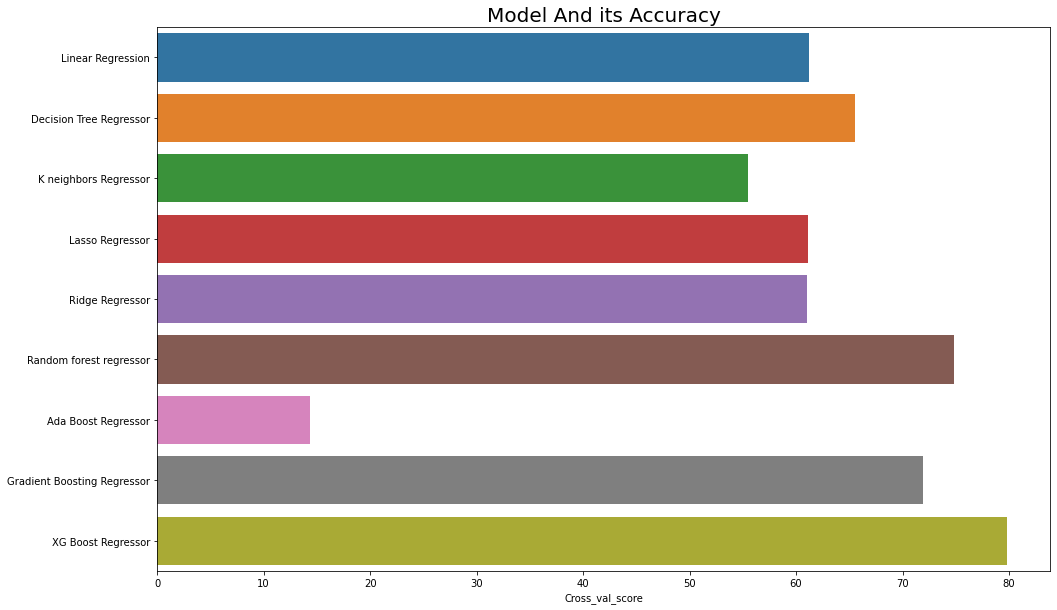

In [195]:
plt.figure(figsize=[16,10])
sns.barplot(data=result,x='Cross_val_score',y=result.index)
plt.title('Model And its Accuracy',fontsize=20)

## Best Model
### We are chosing XG Boost Regressor as a best model, Because this model has least diffrence between, R2 score and cross validation score and also its accuracy is highest as compare to others.That is why we are choosing XG Boost 
### Model accuracy is : 82.76
### Cross_validation score : 79.86
### Diffrence : 2.90
### Mean absolute error: 1342.37
### Root mean squared error: 1970.77
.

.

## Hyper Parameter tuning
### Grid search cv

In [206]:
parameter= {"learning_rate" : [0.10, 0.20,0.40 ] ,
            "max_depth" : [5,10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma" : [ 0.1, 0.2 , 0.3, 0.4 ]}

In [207]:
GSC=GridSearchCV(XG,parameter,cv=3)
GSC.fit(x_train,y_train)
GSC.best_params_

{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1}

In [208]:
GSC.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [209]:
GSC_pred=GSC.best_estimator_.predict(x_test)
r2_score(y_test,GSC_pred)

0.8272244202612242

In [211]:
XG_new=xg.XGBRegressor(gamma= 0.1, learning_rate= 0.2, max_depth= 5, min_child_weight= 1)
XG_new.fit(x_train,y_train)
pred=XG_new.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.8272244202612242
Mean absolute error: 1384.9857728115196
Mean squared error: 3894132.6902896324
Root mean squared error: 1973.3556927958102


In [214]:
pred=XG_new.predict(x_test)

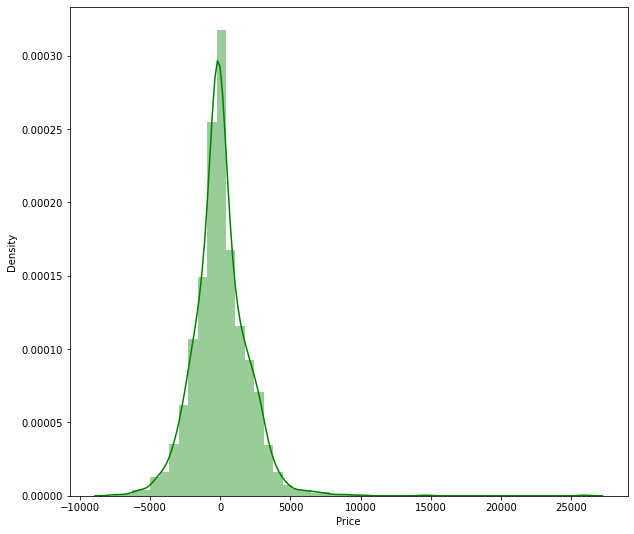

In [216]:
plt.figure(figsize =(10,9))
sns.distplot(y_test-pred,color='g')
plt.show()

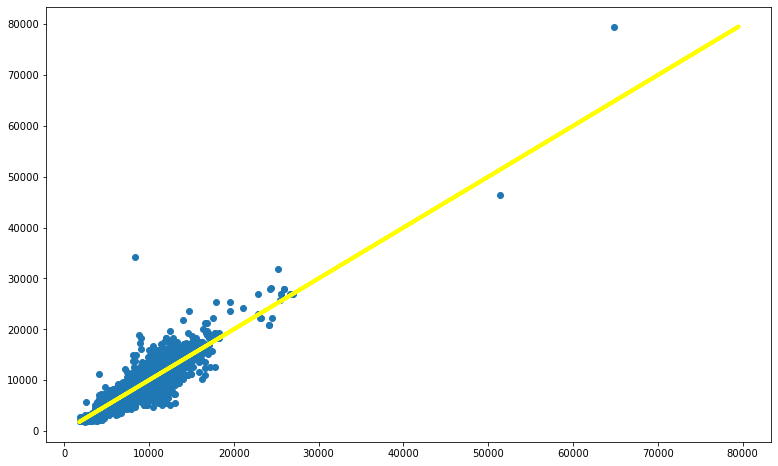

In [219]:
plt.figure(figsize=[13,8])
plt.scatter(pred,y_test)
plt.plot(y_test,y_test,linewidth=4,color='yellow')
plt.show()

### We have done with Hyper parameter tuning.
### Model-XG Boost regressor
## Accuracy=82.72 %

In [220]:
import joblib

In [221]:
joblib.dump(XG_new,'Flight_price1.pkl')

['Flight_price1.pkl']

## Prediction of Price

In [223]:
model=joblib.load('Flight_price1.pkl')

In [224]:
prediction=model.predict(x_test)

In [225]:
final=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predict','Original'])

In [229]:
final.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,...,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350
Predict,14052.839844,5941.509277,4713.57666,5297.589844,7754.015625,3848.594971,4250.816895,4432.433105,4611.470215,2696.540527,...,12170.010742,11236.625,4019.531494,8929.264648,6789.538574,6649.192871,11133.451172,11681.401367,4427.20459,7873.495117
Original,12819.000000,7276.000000,4804.00000,5678.000000,7878.000000,3971.000000,4174.000000,4174.000000,3597.000000,2050.000000,...,12373.000000,10844.000,3943.000000,11465.000000,6442.000000,6587.000000,15898.000000,15147.000000,4804.00000,4227.000000


# Conclusion

From the above observations we are concluding that

1. We had no null values in data set, So we did not adopt imputation technique.

2. In order to replace the object data to the int values we used encoading technique.

    For this we used one hot encoder.

3. Some columns we dropped, because they was not more contributing to make prediction.

4. We have changed the format of date column in the day, month, year format So that our machine can easily understand the inputs of this column.Same work we did with age column and devide the age column in the group format.


We used many Regressor for building our best model -

like-

A. Linear regression

B. k nearest neighbour regressor

c. Design tree regressor

5. In order to control overfitting and underfitting we adopted Cross validation.

6. For Bagging and boosting we have used Random forest regressor,Adaboost regressor and Gradient boosting regressor and xgboost regressor.

7. we worked on Hyper parameter tuning on xgboost regressor for boosting our model accuracy.

Finally we got our best model Which is xgboost regressor with  82.72 % accuracy.


### Now our model is ready to predict. 

## Model name- Xg Boost Regressor
## Accuracy - 82.72 %